In [2]:
import pandas as pd
import matplotlib.pyplot as mat
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"C:\Users\Prithviraj Ghorpade\Downloads\possum.csv")
data

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [4]:
data.shape

(104, 14)

In [5]:
# deleted missing data
data = data.dropna()

In [6]:
data.shape

(101, 14)

In [15]:
x = data.drop(['case','site','Pop','sex'],axis=1)
x.head()

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [16]:
y = data['sex']
y.head()

0    m
1    f
2    f
3    f
4    f
Name: sex, dtype: object

In [17]:
x_train , x_test ,y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=44)

In [19]:
Rand_model = RandomForestClassifier(n_estimators=50,max_features='sqrt',random_state=44)
Rand_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=44)

In [20]:
prediction = Rand_model.predict(x_test)
prediction

array(['f', 'm', 'm', 'm', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'f', 'm',
       'm', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'f', 'm', 'm', 'm',
       'm', 'm', 'm', 'm', 'f'], dtype=object)

In [23]:
cm = confusion_matrix(y_test,prediction)
cm

array([[ 5,  9],
       [ 3, 14]], dtype=int64)

In [25]:
acc = accuracy_score(y_test,prediction)
print('Accuracy',acc)

Accuracy 0.6129032258064516


In [28]:
importance = Rand_model.feature_importances_
columns = x.columns
i = 0

while i<len(columns):
    print(f'The importance of Feature {columns[i]} is {round(importance[i]*100,2)}%.')
    i += 1

The importance of Feature age is 5.24%.
The importance of Feature hdlngth is 14.62%.
The importance of Feature skullw is 8.88%.
The importance of Feature totlngth is 11.32%.
The importance of Feature taill is 7.15%.
The importance of Feature footlgth is 16.1%.
The importance of Feature earconch is 11.99%.
The importance of Feature eye is 11.08%.
The importance of Feature chest is 5.29%.
The importance of Feature belly is 8.34%.


<Axes: >

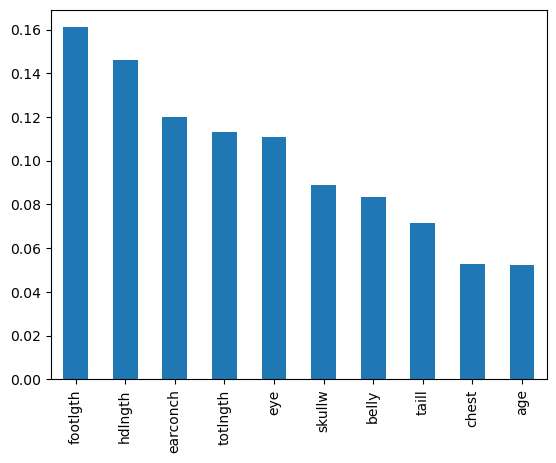

In [37]:
feature_importance = pd.Series(Rand_model.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_importance.plot.bar()

In [29]:
x_train.head()

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
4,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
78,1.0,85.8,50.0,81.0,36.5,62.8,43.0,14.8,22.0,28.5
100,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
91,2.0,90.7,56.3,85.0,37.0,67.6,46.8,14.5,25.5,31.0


In [31]:
y_train.head()

4      f
78     m
100    m
0      m
91     m
Name: sex, dtype: object

In [30]:
possum = [[2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0]]
Rand_model.predict(possum)

array(['f'], dtype=object)